# Descripción 

En este cuarto trabajo desarrollarás un proyecto de analítica de datos, usando técnicas de aprendizaje supervisado. Podrás trabajar con un problema de clasificación o con uno de regresión, pero
debe ser un problema de ingeniería real.

Para  este ejercicio decidí utilizar un conjunto de datos de UR3 CobotOps del repositorio UCI Machine Learning Repository sobre el aprendizaje automático de sistemas robóticos y de automatización,en aplivcaciones de robótica industrial para la detección de fallas y optimización operativa. Este dataset compara las siguientes variables: 
- Corrientes eléctricas
- Temperaturas
- Velocidades en las juntas 
- Corriente de agarre
- Recuento de ciclos de operación
- Paradas de protección 
- Pérdidas de agarre

In [2]:
#Importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sns.set_style('darkgrid')

In [8]:
#Cargar datos
df = pd.read_csv('C:/Users/EQUIPO/Desktop/dataset_02052023.csv')
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Visualizamos los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [10]:
#Identificamos variables numéricas
df.describe()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
count,7409.000000,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3705.000000,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2138.938405,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1853.000000,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3705.000000,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5557.000000,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#Identificamos variables categóricas
df.describe(include=['object'])

,Timestamp
count,7409
unique,7409
top,2022-10-26T08:17:21.847Z
freq,1


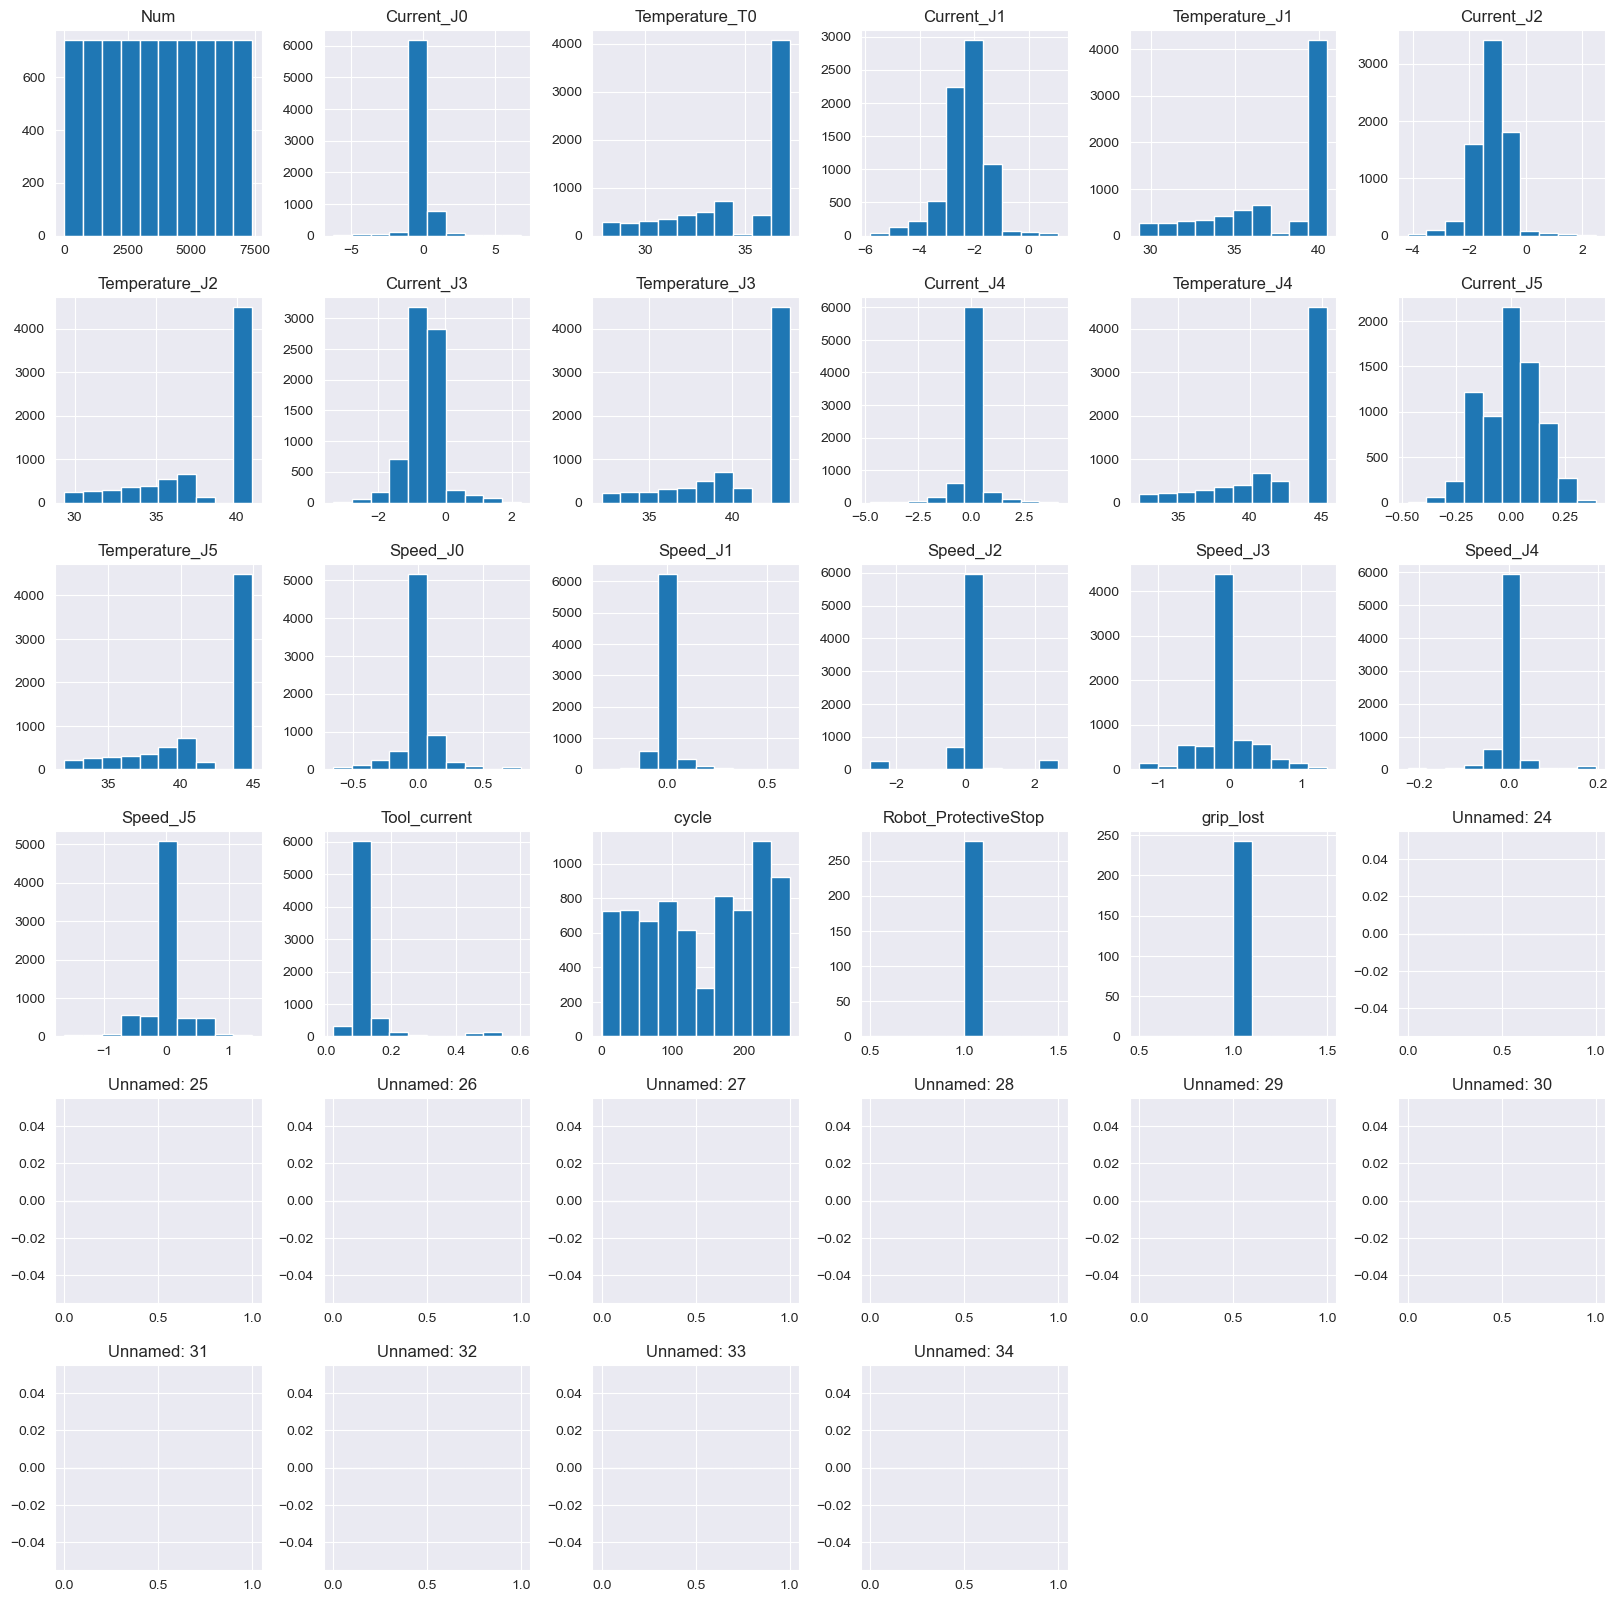

In [11]:
df.hist(figsize=(20,20))
plt.show()

In [13]:
mean = df['Current_J0'].mean() #media
median = df['Current_J0'].median() #mediana
mode = df['Current_J0'].mode() #moda
skew = df['Current_J0'].skew() #sesgo
kurt = df['Current_J0'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: -0.04893438721086364
Mediana: -0.08082988858223
Moda: 0    1.0
Name: Current_J0, dtype: float64
Sesgo: 0.03388798458661315
Kurtosis: 22.98965317153077


In [14]:
mean = df['Temperature_T0'].mean() #media
median = df['Temperature_T0'].median() #mediana
mode = df['Temperature_T0'].mode() #moda
skew = df['Temperature_T0'].skew() #sesgo
kurt = df['Temperature_T0'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 34.906781101291635
Mediana: 36.5
Moda: 0    37.125
Name: Temperature_T0, dtype: float64
Sesgo: -1.006933663283301
Kurtosis: -0.31791090633027386


In [47]:
mean = df['Current_J1'].mean() #media
median = df['Current_J1'].median() #mediana
mode = df['Current_J1'].mode() #moda
skew = df['Current_J1'].skew() #sesgo
kurt = df['Current_J1'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: -2.2979357523362425
Mediana: -2.2363421916962
Moda: 0      -5.808734
1      -5.742628
2      -5.664057
3      -5.631962
4      -5.620156
          ...   
7350    1.061292
7351    1.073908
7352    1.074096
7353    1.074144
7354    1.083596
Name: Current_J1, Length: 7355, dtype: float64
Sesgo: -0.5293371243465542
Kurtosis: 2.864121832123197


In [17]:
mean = df['Temperature_J1'].mean() #media
median = df['Temperature_J1'].median() #mediana
mode = df['Temperature_J1'].mode() #moda
skew = df['Temperature_J1'].skew() #sesgo
kurt = df['Temperature_J1'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 37.659636301835484
Mediana: 39.6875
Moda: 0    40.3125
Name: Temperature_J1, dtype: float64
Sesgo: -1.0127409641776277
Kurtosis: -0.32323676288143144


In [19]:
mean = df['Current_J2'].mean() #media
median = df['Current_J2'].median() #mediana
mode = df['Current_J2'].mode() #moda
skew = df['Current_J2'].skew() #sesgo
kurt = df['Current_J2'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: -1.199381182734288
Mediana: -1.0771368741989
Moda: 0   -1.147996
1   -0.758322
Name: Current_J2, dtype: float64
Sesgo: -0.11192162440337039
Kurtosis: 4.546727262089984


In [20]:
mean = df['Temperature_J2'].mean() #media
median = df['Temperature_J2'].median() #mediana
mode = df['Temperature_J2'].mode() #moda
skew = df['Temperature_J2'].skew() #sesgo
kurt = df['Temperature_J2'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 38.064063562202584
Mediana: 40.1875
Moda: 0    40.375
Name: Temperature_J2, dtype: float64
Sesgo: -1.048101781800794
Kurtosis: -0.23327495185934488


In [18]:
mean = df['Current_J3'].mean() #media
median = df['Current_J3'].median() #mediana
mode = df['Current_J3'].mode() #moda
skew = df['Current_J3'].skew() #sesgo
kurt = df['Current_J3'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: -0.605312371693448
Mediana: -0.57118958234787
Moda: 0   -0.651117
Name: Current_J3, dtype: float64
Sesgo: 0.38031937058458504
Kurtosis: 4.733923214797235


In [21]:
mean = df['Temperature_J3'].mean() #media
median = df['Temperature_J3'].median() #mediana
mode = df['Temperature_J3'].mode() #moda
skew = df['Temperature_J3'].skew() #sesgo
kurt = df['Temperature_J3'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 40.93699864038069
Mediana: 43.0625
Moda: 0    43.125
Name: Temperature_J3, dtype: float64
Sesgo: -1.1434703938153645
Kurtosis: 0.060063423946919325


In [26]:
mean = df['Current_J4'].mean() #media
median = df['Current_J4'].median() #mediana
mode = df['Current_J4'].mode() #moda
skew = df['Current_J4'].skew() #sesgo
kurt = df['Current_J4'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: -0.022967840582325677
Mediana: -0.012324682436883
Moda: 0      -4.738406
1      -4.060150
2      -4.044099
3      -4.036009
4      -4.033419
          ...   
7350    4.065208
7351    4.065488
7352    4.072007
7353    4.073812
7354    4.089389
Name: Current_J4, Length: 7355, dtype: float64
Sesgo: 0.12594053633245933
Kurtosis: 14.573289200218909


In [25]:
mean = df['Temperature_J4'].mean() #media
median = df['Temperature_J4'].median() #mediana
mode = df['Temperature_J4'].mode() #moda
skew = df['Temperature_J4'].skew() #sesgo
kurt = df['Temperature_J4'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 42.60516655336506
Mediana: 45.0625
Moda: 0    45.25
Name: Temperature_J4, dtype: float64
Sesgo: -1.1710607077735526
Kurtosis: 0.14309317401183197


In [27]:
mean = df['Current_J5'].mean() #media
median = df['Current_J5'].median() #mediana
mode = df['Current_J5'].mode() #moda
skew = df['Current_J5'].skew() #sesgo
kurt = df['Current_J5'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 0.0009040134333675402
Mediana: 0.014496382325888
Moda: 0      -0.474556
1      -0.454900
2      -0.442023
3      -0.433048
4      -0.422988
          ...   
7350    0.349057
7351    0.353467
7352    0.358622
7353    0.364147
7354    0.392547
Name: Current_J5, Length: 7355, dtype: float64
Sesgo: -0.13003999178516548
Kurtosis: -0.266815492922468


In [30]:
mean = df['Temperature_J5'].mean() #media
median = df['Temperature_J5'].median() #mediana
mode = df['Temperature_J5'].mode() #moda
skew = df['Temperature_J5'].skew() #sesgo
kurt = df['Temperature_J5'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 41.89109449354181
Mediana: 44.375
Moda: 0    44.5
Name: Temperature_J5, dtype: float64
Sesgo: -1.085168263667912
Kurtosis: -0.14010702996501934


In [31]:
mean = df['Speed_J0'].mean() #media
median = df['Speed_J0'].median() #mediana
mode = df['Speed_J0'].mode() #moda
skew = df['Speed_J0'].skew() #sesgo
kurt = df['Speed_J0'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 0.0016707168266376288
Mediana: 0.0
Moda: 0    0.0
Name: Speed_J0, dtype: float64
Sesgo: 0.20048400329604765
Kurtosis: 7.48963080552381


In [32]:
mean = df['Speed_J1'].mean() #media
median = df['Speed_J1'].median() #mediana
mode = df['Speed_J1'].mode() #moda
skew = df['Speed_J1'].skew() #sesgo
kurt = df['Speed_J1'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 6.112906123910418e-05
Mediana: 0.0
Moda: 0    0.0
Name: Speed_J1, dtype: float64
Sesgo: 2.0047424686734066
Kurtosis: 17.54298032453434


In [33]:
mean = df['Speed_J2'].mean() #media
median = df['Speed_J2'].median() #mediana
mode = df['Speed_J2'].mode() #moda
skew = df['Speed_J2'].skew() #sesgo
kurt = df['Speed_J2'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 0.0037909180870843748
Mediana: 0.0
Moda: 0    0.0
Name: Speed_J2, dtype: float64
Sesgo: 0.0839134037087977
Kurtosis: 8.758099788320521


In [34]:
mean = df['Speed_J3'].mean() #media
median = df['Speed_J3'].median() #mediana
mode = df['Speed_J3'].mode() #moda
skew = df['Speed_J3'].skew() #sesgo
kurt = df['Speed_J3'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: -0.004610074676471283
Mediana: 0.0
Moda: 0    0.0
Name: Speed_J3, dtype: float64
Sesgo: -0.0027453839685921406
Kurtosis: 2.4963544558777375


In [35]:
mean = df['Speed_J4'].mean() #media
median = df['Speed_J4'].median() #mediana
mode = df['Speed_J4'].mode() #moda
skew = df['Speed_J4'].skew() #sesgo
kurt = df['Speed_J4'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: -0.0008095321344124012
Mediana: 0.0
Moda: 0    0.0
Name: Speed_J4, dtype: float64
Sesgo: -0.06596519246555796
Kurtosis: 14.355524290758044


In [36]:
mean = df['Speed_J5'].mean() #media
median = df['Speed_J5'].median() #mediana
mode = df['Speed_J5'].mode() #moda
skew = df['Speed_J5'].skew() #sesgo
kurt = df['Speed_J5'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 0.0028802935759752574
Mediana: 0.0
Moda: 0    0.0
Name: Speed_J5, dtype: float64
Sesgo: -0.19742090489859798
Kurtosis: 4.835196272417975


In [37]:
mean = df['Tool_current'].mean() #media
median = df['Tool_current'].median() #mediana
mode = df['Tool_current'].mode() #moda
skew = df['Tool_current'].skew() #sesgo
kurt = df['Tool_current'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 0.10952737502383982
Mediana: 0.08519184589386
Moda: 0    0.083239
Name: Tool_current, dtype: float64
Sesgo: 3.9107558969097598
Kurtosis: 15.36518143237387


In [48]:
mean = df['cycle '].mean() #media
median = df['cycle '].median() #mediana
mode = df['cycle '].mode() #moda
skew = df['cycle '].skew() #sesgo
kurt = df['cycle '].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 141.11324065325954
Mediana: 154.0
Moda: 0    99
Name: cycle , dtype: int64
Sesgo: -0.14279087858488254
Kurtosis: -1.3615597514997677


In [45]:
mean = df['Robot_ProtectiveStop'].mean() #media
median = df['Robot_ProtectiveStop'].median() #mediana
mode = df['Robot_ProtectiveStop'].mode() #moda
skew = df['Robot_ProtectiveStop'].skew() #sesgo
kurt = df['Robot_ProtectiveStop'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 1.0
Mediana: 1.0
Moda: 0    1.0
Name: Robot_ProtectiveStop, dtype: float64
Sesgo: 0.0
Kurtosis: 0.0


In [43]:
mean = df['grip_lost'].mean() #media
median = df['grip_lost'].median() #mediana
mode = df['grip_lost'].mode() #moda
skew = df['grip_lost'].skew() #sesgo
kurt = df['grip_lost'].kurt() #curtosis

#Imprimimos
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Sesgo:", skew)
print("Kurtosis:", kurt)

Media: 1.0
Mediana: 1.0
Moda: 0    1.0
Name: grip_lost, dtype: float64
Sesgo: 0.0
Kurtosis: 0.0


Del análisis anterior identificamos ciertas incongruencias en los datos, especificamente en las variables de 'Current_J1', 'Current_J4' y 'Current_J5', donde con los valores arrojados en la moda podemos plantear las siguientes hipótesis:
- Datos erróneos.
- Distribución de datos anormal.
- Presencia de valores atípicos.